SMAI, Assignment-3, Q-1,2,3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

# Question: 1

In [2]:
X_data_m = pd.read_csv('WineQT.csv')
X_data_m

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
X_data = X_data_m.drop("Id",axis=1)
# X_data = X_data.drop("quality",axis=1)
print("The shape of the data:",np.array(X_data).shape)
X_data.columns

The shape of the data: (1143, 12)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## 1.1

### 1.1.1 mean, standard deviation, min, and max values for all attributes.


In [4]:
X_mean = np.mean(X_data,axis=0)
X_std = np.std(X_data,axis=0)
X_min = np.min(X_data,axis=0)
X_max = np.max(X_data,axis=0)
col = ['Mean','Std','Max','Min']
inx = X_data.columns
data = np.array([X_mean,X_std,X_max,X_min]).T
print(pd.DataFrame(data, index=inx, columns=col))

                           Mean        Std        Max      Min
fixed acidity          8.311111   1.746830   15.90000  4.60000
volatile acidity       0.531339   0.179555    1.58000  0.12000
citric acid            0.268364   0.196600    1.00000  0.00000
residual sugar         2.532152   1.355324   15.50000  0.90000
chlorides              0.086933   0.047247    0.61100  0.01200
free sulfur dioxide   15.615486  10.246001   68.00000  1.00000
total sulfur dioxide  45.914698  32.767787  289.00000  6.00000
density                0.996730   0.001924    1.00369  0.99007
pH                     3.311015   0.156596    4.01000  2.74000
sulphates              0.657708   0.170324    2.00000  0.33000
alcohol               10.442111   1.081722   14.90000  8.40000
quality                5.657043   0.805472    8.00000  3.00000


### 1.1.2 Graph to show the distribution of the various labels across the entire dataset

Text(0, 0.5, 'Count')

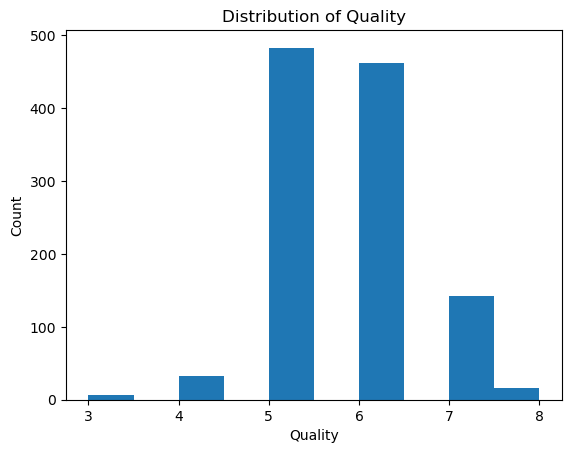

In [5]:
X_data["quality"].sort_index().plot(kind='hist')
# Y_data.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

Observations:      
The maximum number of samples are labeled as 5 and 6(quality measure).

### Distribution of the various features across the entire dataset

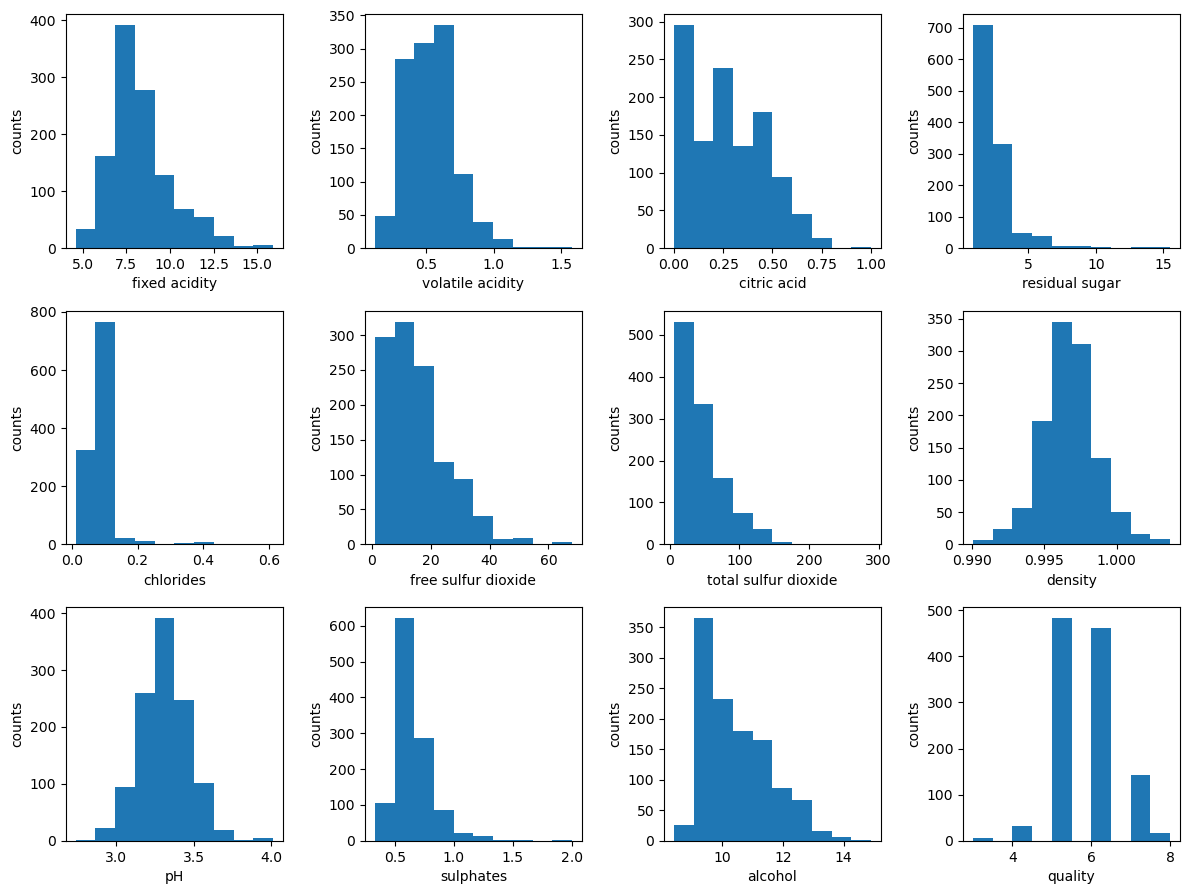

In [89]:
fig, axes = plt.subplots(3,4, figsize = (12,9))
i = 0
k=0
j=0
for attribute in X_data.columns:
    k = k+1
    axes[i][j].hist(X_data[attribute])
    axes[i][j].set_xlabel(attribute)
    axes[i][j].set_ylabel("counts")
    j = j+1
    if k%4 == 0:
        i = i+1
        j=0

plt.tight_layout()
plt.show()

### Graph of Quality vs dataset features

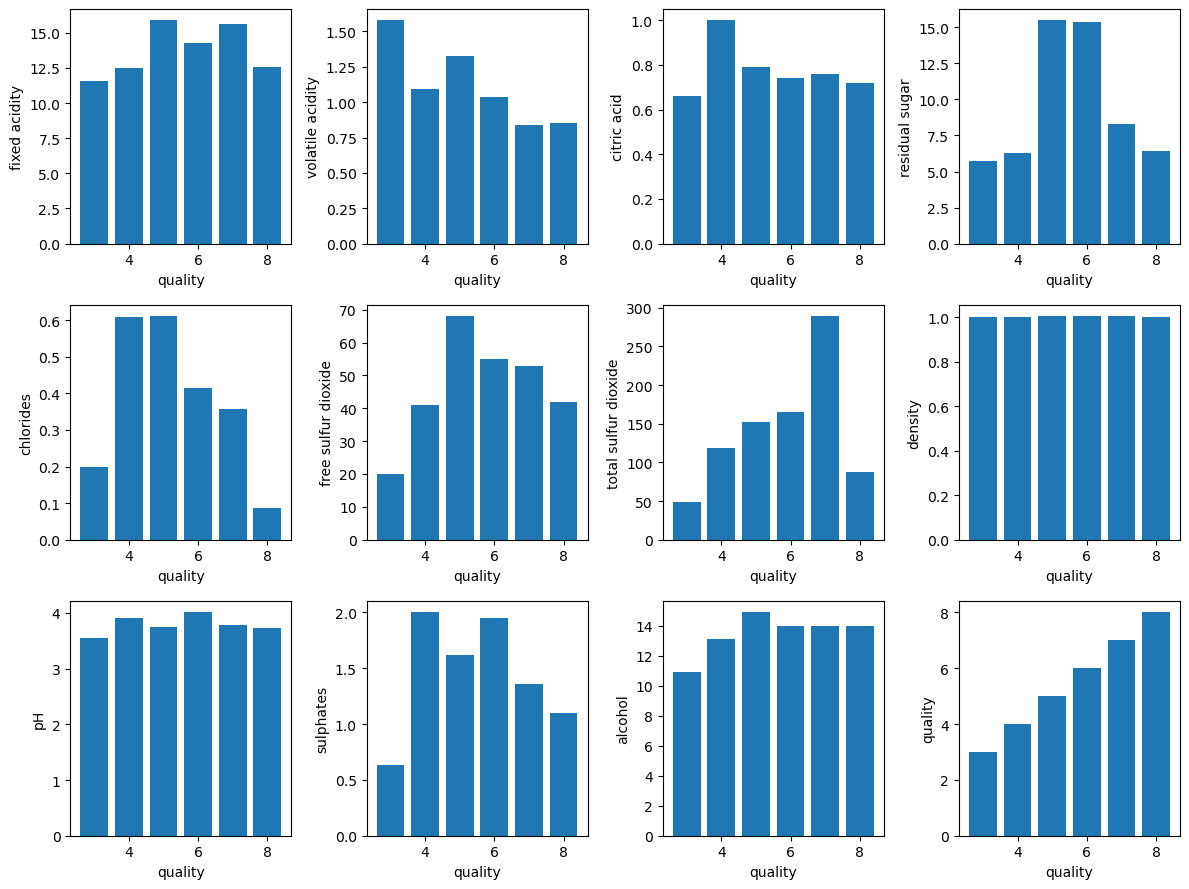

In [101]:
fig, axes = plt.subplots(3,4, figsize = (12,9))
i = 0
k=0
j=0
attribute = 'quality'
for other_attribute in X_data.columns:
    k = k+1
    axes[i][j].bar(Y_data,X_data[other_attribute])
    axes[i][j].set_xlabel(attribute)
    axes[i][j].set_ylabel(other_attribute)
    j = j+1
    if k%4 == 0:
        i = i+1
        j=0

plt.tight_layout()
plt.show()

Obsevations:          
Volatile acidity is inverse with respect to quality.                
Most feature have maximum value for the quality value 4 to 6.                         
In the most features intially the value is increse and then decrease with respect to quality values.

### 1.1.3 Partition the dataset into train, validation, and test sets

In [32]:
Y_data = X_data['quality']
X_train_t, X_test, Y_train_t, Y_test = train_test_split(X_data,Y_data,test_size=0.15,random_state=1)
X_train, X_valid,Y_train, Y_valid = train_test_split(X_train_t,Y_train_t,test_size=0.177,random_state=1)
print("Shape of the train, test and validaton data:",X_train.shape,X_test.shape,X_valid.shape)
print("Shape of the train, test and validaton label:",Y_train.shape,Y_test.shape,Y_valid.shape)

Shape of the train, test and validaton data: (799, 12) (172, 12) (172, 12)
Shape of the train, test and validaton label: (799,) (172,) (172,)


### 1.1.4 Normalise and standarize the dataset

In [42]:
X_train_norm = preprocessing.normalize(X_train,axis=0)
X_test_norm = preprocessing.normalize(X_test,axis=0)
X_valid_norm = preprocessing.normalize(X_valid,axis=0)
std = preprocessing.StandardScaler()
X_train_norm = std.fit_transform(X=X_train_norm)
X_test_norm = std.fit_transform(X=X_test_norm)
X_valid_norm = std.fit_transform(X=X_valid_norm)

X_train_norm_df = pd.DataFrame(X_train_norm,columns= X_data.columns)
X_test_norm_df = pd.DataFrame(X_test_norm,columns= X_data.columns)
X_valid_norm_df = pd.DataFrame(X_valid_norm,columns= X_data.columns)

Y_train_norm_df = X_train_norm_df["quality"]
Y_test_norm_df = X_test_norm_df["quality"]
Y_valid_norm_df = X_valid_norm_df["quality"]

X_train_norm_df = X_train_norm_df.drop('quality',axis=1)
X_test_norm_df = X_test_norm_df.drop('quality',axis=1)
X_valid_norm_df = X_valid_norm_df.drop('quality',axis=1)

print("Shape of the train, test and validaton data:")
print(X_train_norm_df.shape,X_test_norm_df.shape,X_valid_norm_df.shape)
print("\n Train data set after columns wise normalization:")
X_train_norm_df

Shape of the train, test and validaton data:
(799, 11) (172, 11) (172, 11)

 Train data set after columns wise normalization:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.479978,0.447052,-0.352572,-0.625489,-0.219921,1.934604,0.439019,-0.935328,-1.335305,-1.455911,-1.061597
1,0.040535,0.778786,-0.403348,-0.240046,0.130153,-0.456567,0.904879,0.331239,-0.699635,-0.394786,-1.154998
2,-1.289666,0.391763,-0.961883,-0.548400,-0.322884,-0.169626,-0.026840,-1.762260,0.444571,-0.674029,0.526210
3,0.503214,0.004740,-0.149468,0.068309,-0.178735,1.169429,2.892545,0.603394,-0.636068,-0.506483,-0.874796
4,-0.595648,0.336474,-0.047916,3.614386,-0.343476,1.838957,2.333513,0.718537,0.381004,-0.953273,-0.968197
...,...,...,...,...,...,...,...,...,...,...,...
794,-0.653483,-0.271705,-1.012659,2.303879,0.047783,-0.552214,-0.865386,0.059084,0.381004,0.107853,0.713011
795,-0.653483,0.557630,-1.215763,-0.240046,-0.137550,0.117314,1.308623,0.378343,1.398076,-0.450634,-0.594595
796,1.370736,-0.548150,0.612171,-0.240046,0.397857,-0.743507,-0.430585,0.980224,-2.670211,-0.897424,-0.781396
797,-1.000492,1.082876,-0.911107,2.303879,0.624376,-0.647861,-0.896444,-0.092694,0.253870,-0.953273,0.339410


In [43]:
print("\n Test data set after columns wise normalization:")
X_test_norm_df


 Test data set after columns wise normalization:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.594938,-0.429962,0.188150,-0.286942,0.991559,-0.952506,-0.826115,0.051458,-0.585218,0.487928,0.748354
1,-0.655060,-1.332225,0.136782,-0.403618,-0.090447,1.855704,0.614753,0.126373,0.868092,-1.158979,-0.890385
2,-0.314151,-1.847804,0.034046,-0.403618,-0.811784,0.507764,0.864134,-0.858229,-1.027529,0.968276,0.475231
3,-1.109605,0.021170,-0.531001,-0.636970,-0.210670,1.294062,-0.299644,-1.907045,0.046656,1.174139,1.112518
4,-0.711878,0.021170,-0.633737,-0.170266,-0.258759,0.058450,-0.299644,-0.430141,0.299405,-0.404146,-0.617262
...,...,...,...,...,...,...,...,...,...,...,...
167,0.424484,-1.203330,1.369613,-0.286942,0.606846,-1.064834,-0.992369,-0.547866,-0.016532,-0.198283,0.839395
168,-0.143697,1.084552,-0.171426,-0.053590,-0.258759,-0.166207,0.974970,0.094266,-0.458843,-0.747252,-0.799344
169,-0.598242,-1.203330,1.061405,-0.286942,-0.282803,1.069405,-0.050263,-0.729803,0.552155,1.380003,0.566272
170,-0.257333,0.214512,-1.198785,-0.403618,-0.306848,-0.615520,-0.770697,0.051458,0.299405,-0.541389,-0.799344


In [44]:
print("\n Validation data set after columns wise normalization:")
X_valid_norm_df


 Validation data set after columns wise normalization:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.892555,1.098129,-0.450701,1.586883,0.469253,1.626419,0.933036,0.985314,-1.147865,-0.684959,-1.019634
1,-0.707180,0.071059,-1.419708,-0.379993,-0.222066,2.201039,0.274422,-0.575347,0.502911,1.249682,0.782185
2,0.727065,-0.545183,0.365305,-0.379993,-0.135651,0.094100,-0.258741,-0.271067,-0.553586,0.048870,0.511912
3,0.175432,0.533240,-0.552702,0.045278,0.210008,0.477180,2.281625,0.602511,-1.478020,-0.885094,-1.109724
4,0.451248,-1.572253,-0.195699,-0.379993,-0.243670,-1.438220,-0.572366,1.093285,0.634973,1.449817,-0.208815
...,...,...,...,...,...,...,...,...,...,...,...
167,-0.431364,0.584594,-1.419708,-0.220516,-0.265274,0.189870,-0.541004,-0.133650,0.040694,-0.351400,-0.479088
168,-0.045221,-1.366839,0.314305,-0.167358,-0.351689,-0.001670,0.023522,-0.408484,0.568942,0.849411,0.692094
169,0.175432,-1.084395,0.620307,-0.326834,-0.222066,-1.246680,-1.262342,-0.810918,-0.289462,0.115582,1.232639
170,-0.927833,0.276473,-1.317707,-0.220516,-0.438103,0.285640,-0.196016,-1.424386,0.436880,0.048870,1.863275


In [45]:
X_data["quality"].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

# 1.2 Model Building

### 1.2.1 Multinomial Logistic Regression model from scratch.
### The cross entropy loss is used as loss function and Gradient descent used as the optimization algorithm

In [46]:
class multinomial_logistic_regration:
    def __init__(self, learning_rate = 0.01, epoch = 100,thresold_value = 0.000001):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.loss = []
        self.thresold_value = thresold_value
    def fit(self, X_train, Y_train):
        self.classes, classes_indices = np.unique(Y_train, return_inverse=True)
        X_train = np.insert(X_train,0,1,axis=1)
        self.weights = np.full((len(self.classes), X_train.shape[1]),0.001)  #kxm
        #one-hot
        Y_one_hot = np.eye(len(self.classes))[classes_indices]
        #fit
        i = 0
        while(i<self.epoch):
            p_k = self.predic_prob_(X_train)   #find softmax
            self.loss.append(self.cross_entropy(Y_one_hot,p_k))
            error = Y_one_hot - p_k
            dj_dw = np.dot(error.T, X_train)
            update_w = dj_dw*self.learning_rate
            self.weights += update_w

            if np.abs(update_w).max()<self.thresold_value:
                break

            i+=1

    def predic_prob_(self,X):
        z = np.dot(X,self.weights.T).reshape(-1,len(self.classes))
        softmax = np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)
        return softmax               #nxk
        
    def predict_classes(self, X_test,internal = 0):
        if internal==0:
            X_test = np.insert(X_test,0,1,axis=1)
        p_prob = self.predic_prob_(X_test)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(p_prob, axis=1))
    
    def cross_entropy(self, Y, p_probs):
        return -1 * np.mean(Y * np.log(p_probs))

    def Accuracy(self, X_test, y):
        X_test = np.insert(X_test,0,1,axis=1)
        return np.mean(self.predict_classes(X_test,internal=1) == y)

### fitting the train data

In [47]:
model = multinomial_logistic_regration(learning_rate=0.0001, epoch=3000)
model.fit(X_train=X_train_norm_df,Y_train=Y_train)

### 1.2.2

### Classification report of the model on validation dataset

In [48]:
target_names = ['3','4', '5', '6', '7', '8']
# target_names = model.classes
Y_pred = model.predict_classes(X_valid_norm_df)
print(classification_report(Y_valid, Y_pred, target_names=target_names,zero_division=True))

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         2
           4       0.00      0.00      1.00         6
           5       0.67      0.76      0.71        72
           6       0.51      0.64      0.57        61
           7       0.92      0.43      0.59        28
           8       1.00      0.00      0.00         3

    accuracy                           0.62       172
   macro avg       0.68      0.31      0.48       172
weighted avg       0.64      0.62      0.63       172



### Accuracy on the train dataset

In [49]:
print('Accuracy:',model.Accuracy(X_train_norm_df,Y_train))

Accuracy: 0.6157697121401752


Training and validation accuracy are same which shows that model is not overfitted on the train data.

### Loss calulation during training based on cross entropy function

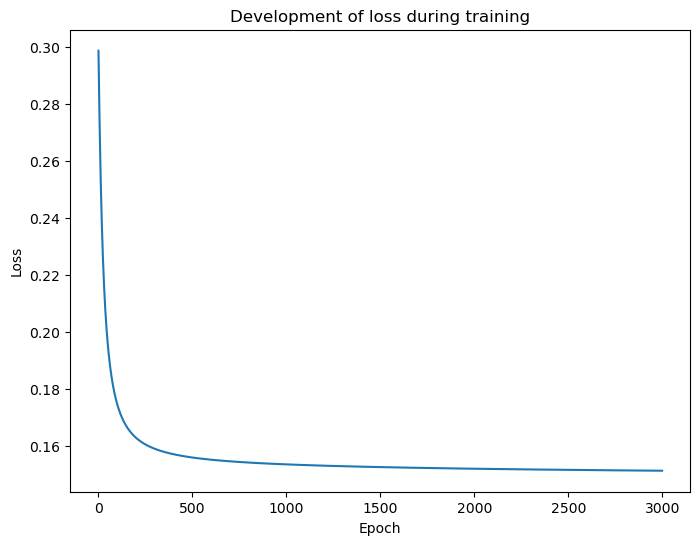

In [50]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(model.loss)),model.loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Development of loss during training")
plt.show()

## 1.3

### 1.3.1 fine-tune the hyperparameters using W&B logging for the validation dataset

In [ ]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-1 Multinomial logistic regression Classification")
# simulate training

from itertools import product
h_param = {
        'learning_rate': [0.1,0.08,0.06,0.04,0.02,0.01,0.008,0.006,0.004,0.002,0.001,0.0005,0.0001],
        'epochs' : [1600,1800,2000,2200,2400,2600,2800,3000,3200,3400,3600,3800,4000,4200,4400]
        }

hyper_param = list(product(*h_param.values()))
j=0
accuracy = []
for i in hyper_param:
        model = multinomial_logistic_regration(learning_rate=i[0], epoch=i[1])
        model.fit(X_train=X_train_norm_df,Y_train=Y_train)
        acc = model.Accuracy(X_valid_norm_df,Y_valid)
        l = model.loss[-1]
        wandb.log({'Accuracy' : acc, "Loss":l, "Hyper parameters":j})
        j = j+1
        accuracy.append(acc)
        
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()


Text(0.5, 1.0, 'Accuracy for different hyper parameters')

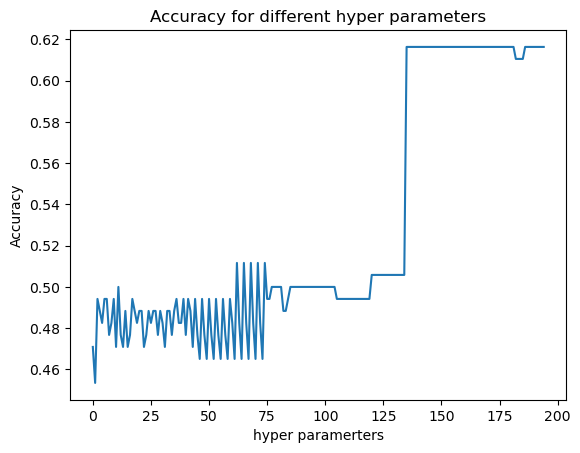

In [59]:
plt.plot(accuracy)
plt.xlabel('hyper paramerters')
plt.ylabel('Accuracy')
plt.title("Accuracy for different hyper parameters")

In [60]:
Max_accu_hy_param_index = np.argmax(accuracy)
accuracy[Max_accu_hy_param_index]
hyper_param[Max_accu_hy_param_index]
print(f"The maximum accuracy = {accuracy[Max_accu_hy_param_index]} \nWe get this accuracy for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Max_accu_hy_param_index]}.")

The maximum accuracy = 0.6162790697674418 
We get this accuracy for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.002, 1600).


### 1.3.2 Classifiction report for test dataset

In [61]:
i = hyper_param[Max_accu_hy_param_index]
model = multinomial_logistic_regration(learning_rate=i[0], epoch=i[1])
model.fit(X_train=X_train_norm_df,Y_train=Y_train)

target_names = ['4', '5', '6', '7', '8']
# target_names = model.classes
Y_pred = model.predict_classes(X_test_norm_df)
print(classification_report(Y_test, Y_pred, target_names=target_names,zero_division=True))

              precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.75      0.76      0.75        79
           6       0.63      0.73      0.68        71
           7       0.22      0.13      0.17        15
           8       0.00      0.00      1.00         4

    accuracy                           0.66       172
   macro avg       0.52      0.33      0.52       172
weighted avg       0.64      0.66      0.67       172



Accuracy on train dataset

In [62]:
print('Accuracy:',model.Accuracy(X_train_norm_df,Y_train))

Accuracy: 0.6220275344180225


The accuracy of the train dataset shows that model is not overfitted

# Question: 2

In [63]:
X_data_m = pd.read_csv('WineQT.csv')
X_data = X_data_m.drop("Id",axis=1)
Y_data = X_data['quality']
X_data = X_data.drop('quality',axis=1)

classes, classes_indices = np.unique(Y_data, return_inverse=True)
#one-hot
Y_one_hot = np.eye(len(classes))[classes_indices]
X_train_t, X_test, Y_train_t, Y_test = train_test_split(X_data,Y_one_hot,test_size=0.15,random_state=1)
X_train, X_valid,Y_train, Y_valid = train_test_split(X_train_t,Y_train_t,test_size=0.177,random_state=1)
print("Shape of the train, test and validaton data:",X_train.shape,X_test.shape,X_valid.shape)
print("Shape of the train, test and validaton label:",Y_train.shape,Y_test.shape,Y_valid.shape)

X_train_norm = preprocessing.normalize(X_train,axis=0)
X_test_norm = preprocessing.normalize(X_test,axis=0)
X_valid_norm = preprocessing.normalize(X_valid,axis=0)
std = preprocessing.StandardScaler()
X_train_norm = std.fit_transform(X=X_train_norm)
X_test_norm = std.fit_transform(X=X_test_norm)
X_valid_norm = std.fit_transform(X=X_valid_norm)

X_train_norm_df = pd.DataFrame(X_train_norm,columns= X_data.columns)
X_test_norm_df = pd.DataFrame(X_test_norm,columns= X_data.columns)
X_valid_norm_df = pd.DataFrame(X_valid_norm,columns= X_data.columns)

print("Shape of the train, test and validaton data:")
print(X_train_norm_df.shape,X_test_norm_df.shape,X_valid_norm_df.shape)


Shape of the train, test and validaton data: (799, 11) (172, 11) (172, 11)
Shape of the train, test and validaton label: (799, 6) (172, 6) (172, 6)
Shape of the train, test and validaton data:
(799, 11) (172, 11) (172, 11)


## 2.1 

Model Class where we can modify and access the learning rate, activation function, optimisers, number of hidden layers and neurons.       
Model Class include the forward propagation, backpropagation, and training.

In [79]:
class multi_layer_perceptron_classification:
    def __init__(self, learning_rate, activation_function,input_size,output_size, hidden_layers = [8], optimiser = 'MBGD',batch_size = 100):
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.input_size = input_size              # no of features in the input dataset
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.optimiser = optimiser
        self.batch_size = batch_size
        self.weights, self.biases = self.intialize_weight_and_bias()
        self.loss = None
    def fit(self,X,y,epochs = 1000):
      
        if self.output_size == 1:
            loss_function = self.binary_cross_entropy_loss
        else:
            loss_function = self.categorical_cross_entropy_loss

        for epoch in range(epochs):

            if self.optimiser=='BGD':
                output, activations = self.forward(X)
                self.backward(X, y, output, activations)

            elif self.optimiser=='MBGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // self.batch_size
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)

                for i in range(num_batches):
                    X_batche = X_batches[i]
                    Y_batche = Y_batches[i]
                    out, activations = self.forward(X_batche)
                    self.backward(X_batche, Y_batche, out, activations)
                    output = np.append(output, out, axis=0)

            elif self.optimiser=='SGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // 1
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)
                for i in range(X.shape[0]):
                    out, activations = self.forward(X_batches[i])
                    self.backward(X_batches[i], Y_batches[i], out, activations)
                    output = np.append(output, out, axis=0)

            else:
                raise ValueError("Invalid optimizer!")
            self.loss = loss_function(y, output)
            # if epoch % 100 == 0:
            #     print(f"Epoch {epoch}, Loss: {loss}")
            
    def intialize_weight_and_bias(self):
        weights = []
        biases = []
        weight = np.random.randn(self.input_size, self.hidden_layers[0])
        bias = np.zeros((self.hidden_layers[0],1))
        weights.append(weight)
        biases.append(bias)
        np.random.seed(42)

        for i in range(1, len(self.hidden_layers)):
            weight = np.random.randn(self.hidden_layers[i-1], self.hidden_layers[i])
            bias = np.zeros((self.hidden_layers[i],1))
            weights.append(weight)
            biases.append(bias)
    
        weight = np.random.randn(self.hidden_layers[-1],self.output_size)
        bias = np.zeros((self.output_size,1))
        weights.append(weight)
        biases.append(bias)

        return weights, biases

    def forward(self, X_train):
        activations = []  #output of layears
        layer_input = X_train #inpute of all layears

        for i in range(len(self.hidden_layers)):
            weighted_sum = np.dot(layer_input ,self.weights[i])
            weighted_sum_n = weighted_sum + np.array(self.biases[i]).T     #check
            activation = self.activation_func(weighted_sum_n)
            
            activations.append(activation)
            layer_input = activation

        output = np.dot(layer_input,self.weights[-1])
        output += np.array(self.biases[-1]).T   #check
        if self.output_size == 1:
            output = self.sigmoid(output)
        else:
            output = self.softmax(output)
        
        return output, activations

    def softmax(self,X):
        exp_X = np.exp(X - np.max(X))  # Stability fix
        return exp_X / np.sum(exp_X, axis=1, keepdims=True).reshape(-1,1)

    def activation_func(self, weighted_sum):
        if self.activation_function == 'ReLU':
            return np.maximum(0, weighted_sum)

        elif (self.activation_function == 'Sigmoid'):
            return 1 / (1 + np.exp(-weighted_sum))

        elif (self.activation_function == 'Tanh'):
            return np.tanh(weighted_sum)

        else:
            raise ValueError("Invalid Activation Function.")
            return 

    def activation_func_derivative(self,X):
        if self.activation_function == 'ReLU' :
            return (X > 0).astype(float)

        elif (self.activation_function == 'Sigmoid'):
            return X * (1 - X)

        elif (self.activation_function == 'Tanh'):
            return (1 - X**2)

        else:
            raise ValueError("Invalid Activation Function.")
            return 

    def backward(self,X,Y, output, activations):
        gradient_weights = []
        gradient_biases = []

        if self.output_size==1:
            error_delta = output-Y
        else:
            error_delta = output-Y
        gradient_weight = np.dot(activations[-1].T,error_delta)
        gradient_bias = np.sum(error_delta.T,axis=1,keepdims=True)

        gradient_weights.append(gradient_weight)
        gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers), 0, -1):
            error = np.dot( error_delta, self.weights[i].T)

            activation_derivative = self.activation_func_derivative(activations[i-1])

            error_delta = error * activation_derivative
            gradient_weight = np.dot(activations[i - 2].T, error_delta) if (i-1) > 0 else np.dot(X.T,error_delta)
            gradient_bias = np.sum(error_delta.T, axis=1, keepdims=True)

            gradient_weights.append(gradient_weight)
            gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers)+1):
            self.weights[i] -= self.learning_rate * gradient_weights[len(self.hidden_layers)-i]
            self.biases[i] -= self.learning_rate * gradient_biases[len(self.hidden_layers)-i]
        # print(self.weights[1])
    def binary_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

    def categorical_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.sum(y_true * np.log(y_pred + epsilon)) / len(y_true)

    def predict_classes(self,X_test):
        output, _ = self.forward(X_test)
        if self.output_size == 1:
            return (output >= 0.5).astype(int)
        else:
            return np.argmax(output, axis=1)

    def Accuracy(self, X_test, Y_test):
        y_pred = self.predict_classes(X_test)
        Y_t = np.argmax(Y_test, axis=1)
        return np.mean(y_pred == Y_t)


In [80]:
model = multi_layer_perceptron_classification(learning_rate=0.01, activation_function = 'Tanh',input_size = 11,output_size = 6, hidden_layers = [8])
model.fit(X_train_norm_df,Y_train)


In [81]:
model.Accuracy(X_test=X_valid_norm_df, Y_test=Y_valid)


0.5406976744186046

In [82]:
model.loss

0.7449402236482392

In [83]:
target_names = ['0','1', '2', '3', '4', '5']

Y_pred = model.predict_classes(X_valid_norm_df)
Y_t = np.argmax(Y_valid, axis=1)
print(classification_report(Y_t, Y_pred, target_names=target_names,zero_division=True))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.00      0.00      1.00         6
           2       0.68      0.64      0.66        72
           3       0.45      0.61      0.51        61
           4       0.62      0.36      0.45        28
           5       1.00      0.00      0.00         3

    accuracy                           0.54       172
   macro avg       0.62      0.27      0.44       172
weighted avg       0.57      0.54      0.57       172



## 2.2 

2.2.1. Log scores - loss and accuracy on W&B                 
2.2.2. Report metrics: accuracy, f-1 score, precision, and recall        
2.2.3. Report the scores for combination of Activation functions and Optimizers.       
2.2.4. Tune model on various hyperparameters, such as learning rate, epochs,
and hidden layer neurons. 1.Accuracy score plot, 2.Report metrics(sklearn), 3.find best model paramenters 

In [ ]:
#2.2.4
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-2.2.4 MLP hyperparameters tunining")

from itertools import product
h_param = {
        'learning_rate': [0.01,0.005, 0.001,0.0005],
        'epochs' : [1000,1500,2000,3000,4000],
        'hidden_layer_neurons': [[8],[10],[13],[16]],
        'activation_functions' : ['ReLU'],
        'optimization_techniques' : ['MBGD']
        }

hyper_param = list(product(*h_param.values()))
J=0
accuracy = []
target_names = ['0','1', '2', '3', '4', '5']
for i in hyper_param:
    model = multi_layer_perceptron_classification(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 11,output_size = 6)
    model.fit(X_train_norm_df,Y_train,epochs=i[1])
    acc = model.Accuracy(X_test=X_valid_norm_df, Y_test=Y_valid,)
    wandb.log({"Hyper parameters pair":J,"accuracy": acc, "loss": model.loss})
    Y_pred = model.predict_classes(X_valid_norm_df)
    Y_t = np.argmax(Y_valid, axis=1)
    print('Hyperparameters',i)
    print(classification_report(Y_t, Y_pred, target_names=target_names,zero_division=True))
    J+=1
    accuracy.append(acc)
wandb.finish()

Text(0.5, 1.0, 'Accuracy for different hyper parameters')

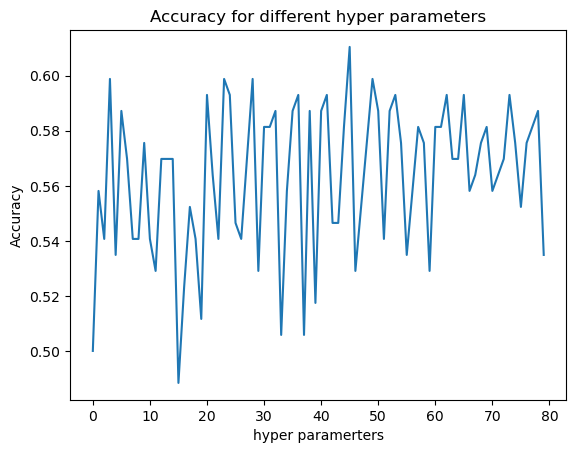

In [88]:
plt.plot(accuracy)
plt.xlabel('hyper paramerters')
plt.ylabel('Accuracy')
plt.title("Accuracy for different hyper parameters")

In [90]:
Max_accu_hy_param_index = np.argmax(accuracy)
accuracy[Max_accu_hy_param_index]
hyper_param[Max_accu_hy_param_index]
print(f"The maximum accuracy = {accuracy[Max_accu_hy_param_index]} \nWe get this accuracy for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Max_accu_hy_param_index]}.")

The maximum accuracy = 0.6104651162790697 
We get this accuracy for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.001, 1500, [10], 'ReLU', 'MBGD').


### Classification report for the best accuracy hyperparameteres

In [99]:
target_names = ['0','1', '2', '3', '4', '5']
i = hyper_param[Max_accu_hy_param_index]
model = multi_layer_perceptron_classification(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 11,output_size = 6)
model.fit(X_train_norm_df,Y_train,epochs=i[1])
Y_pred = model.predict_classes(X_valid_norm_df)
Y_t = np.argmax(Y_valid, axis=1)
print("classification report for the best accuracy model")
print(classification_report(Y_t, Y_pred, target_names=target_names,zero_division=True))

classification report for the best accuracy model
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00         6
           2       0.70      0.64      0.67        72
           3       0.52      0.75      0.61        61
           4       0.76      0.46      0.58        28
           5       1.00      0.00      0.00         3

    accuracy                           0.61       172
   macro avg       0.83      0.31      0.31       172
weighted avg       0.66      0.61      0.59       172



In [ ]:
#2.2.3
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-2.2.3 MLP hyperparameters tunining")

from itertools import product
h_param = {
        'learning_rate': [0.001],
        'epochs' : [1500],
        'hidden_layer_neurons': [[10]],
        'activation_functions' : ['ReLU', 'Sigmoid', 'Tanh'],
        'optimization_techniques' : ['BGD', 'MBGD','SGD']
        }

hyper_param = list(product(*h_param.values()))
J=0
accuracy = []
target_names = ['0','1', '2', '3', '4', '5']
for i in hyper_param:
    model = multi_layer_perceptron_classification(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 11,output_size = 6)
    model.fit(X_train_norm_df,Y_train,epochs=i[1])
    acc = model.Accuracy(X_test=X_valid_norm_df, Y_test=Y_valid,)
    wandb.log({"Hyper parameters pair":J,"accuracy": acc, "loss": model.loss})
    Y_pred = model.predict_classes(X_valid_norm_df)
    Y_t = np.argmax(Y_valid, axis=1)
    print('Hyperparameters',i)
    print(classification_report(Y_t, Y_pred, target_names=target_names,zero_division=True))
    J+=1
    accuracy.append(acc)
wandb.finish()

In [102]:
Max_accu_hy_param_index = np.argmax(accuracy)
accuracy[Max_accu_hy_param_index]
hyper_param[Max_accu_hy_param_index]
print(f"The maximum accuracy = {accuracy[Max_accu_hy_param_index]} \nWe get this accuracy for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Max_accu_hy_param_index]}.")

The maximum accuracy = 0.6104651162790697 
We get this accuracy for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.001, 1500, [10], 'Sigmoid', 'MBGD').


In [106]:
target_names = ['0','1', '2', '3', '4', '5']
i = hyper_param[Max_accu_hy_param_index]
model = multi_layer_perceptron_classification(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 11,output_size = 6)
model.fit(X_train_norm_df,Y_train,epochs=i[1])
Y_pred = model.predict_classes(X_valid_norm_df)
Y_t = np.argmax(Y_valid, axis=1)
print("classification report for the best accuracy model")
print('Hyperparameters',i)
print(classification_report(Y_t, Y_pred, target_names=target_names,zero_division=True))

classification report for the best accuracy model
Hyperparameters (0.001, 1500, [10], 'Sigmoid', 'MBGD')
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.00      0.00      1.00         6
           2       0.70      0.68      0.69        72
           3       0.51      0.70      0.59        61
           4       0.76      0.46      0.58        28
           5       1.00      0.00      0.00         3

    accuracy                           0.61       172
   macro avg       0.66      0.31      0.48       172
weighted avg       0.63      0.61      0.63       172



# 2.3

### 2.3.1. Classification report on the test set.

In [107]:
target_names = ['0','1', '2', '3', '4']
i = hyper_param[Max_accu_hy_param_index]
model = multi_layer_perceptron_classification(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 11,output_size = 6)
model.fit(X_train_norm_df,Y_train,epochs=i[1])
Y_pred = model.predict_classes(X_test_norm_df)
Y_t = np.argmax(Y_test, axis=1)
print("classification report for the test samples")
print('Hyperparameters',i)
print(classification_report(Y_t, Y_pred, target_names=target_names,zero_division=True))

classification report for the test samples
Hyperparameters (0.001, 1500, [10], 'Sigmoid', 'MBGD')
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         3
           1       0.73      0.67      0.70        79
           2       0.55      0.65      0.60        71
           3       0.25      0.27      0.26        15
           4       1.00      0.00      0.00         4

    accuracy                           0.60       172
   macro avg       0.71      0.32      0.31       172
weighted avg       0.62      0.60      0.59       172



### 2.3.2. Compare the results with the results of the logistic regression model

Table of the logistic regration classification report:
        precision    recall  f1-score   support

           4       1.00      0.00      0.00         3
           5       0.75      0.76      0.75        79
           6       0.63      0.73      0.68        71
           7       0.22      0.13      0.17        15
           8       0.00      0.00      1.00         4

    accuracy                           0.66       172
   macro avg       0.52      0.33      0.52       172
weighted avg       0.64      0.66      0.67       172

The accuracy in case of multinomial logistic regration is 0.66 and for MLP it is 0.60.        
All the results are almost similar between both  the tables.

# 2.4

In [30]:
#Multioutput classifiction
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
data_read = pd.read_csv('advertisement.csv')
data_read.columns
X = data_read.drop("labels",axis = 1)
Y = data_read["labels"]
column_matrix = np.array(Y)
result = [(entry.split()) for entry in column_matrix]

mlb = MultiLabelBinarizer()
encoded_labels = mlb.fit_transform(result)

#simple encoding
X = data_read.drop("labels",axis = 1)
df = pd.DataFrame(X)
categorical_columns = ['gender', 'education', 'married', 'city', 'occupation', 'most bought item']

label_encoders = {}
encoded_data = df.copy()

for col_index in categorical_columns:
    le = LabelEncoder()
    encoded_column = le.fit_transform(df[col_index])
    encoded_data[col_index] = encoded_column
    label_encoders[col_index] = le
print("Data shape:",encoded_data.shape,"Label shape:",encoded_labels.shape)

Data shape: (1000, 10) Label shape: (1000, 8)


In [31]:
X_train_t, X_test, Y_train_t, Y_test = train_test_split(encoded_data,encoded_labels,test_size=0.15,random_state=1)
X_train, X_valid,Y_train, Y_valid = train_test_split(X_train_t,Y_train_t,test_size=0.176,random_state=1)
print("Shape of the train, test and validaton data:",X_train.shape,X_test.shape,X_valid.shape)
print("Shape of the train, test and validaton label:",Y_train.shape,Y_test.shape,Y_valid.shape)

X_train_norm = preprocessing.normalize(X_train,axis=0)
X_test_norm = preprocessing.normalize(X_test,axis=0)
X_valid_norm = preprocessing.normalize(X_valid,axis=0)
std = preprocessing.StandardScaler()
X_train_norm = std.fit_transform(X=X_train_norm)
X_test_norm = std.fit_transform(X=X_test_norm)
X_valid_norm = std.fit_transform(X=X_valid_norm)

X_train_norm_df = pd.DataFrame(X_train_norm,columns= encoded_data.columns)
X_test_norm_df = pd.DataFrame(X_test_norm,columns= encoded_data.columns)
X_valid_norm_df = pd.DataFrame(X_valid_norm,columns= encoded_data.columns)

print("Shape of the train, test and validaton data:")
print(X_train_norm_df.shape,X_test_norm_df.shape,X_valid_norm_df.shape)

Shape of the train, test and validaton data: (700, 10) (150, 10) (150, 10)
Shape of the train, test and validaton label: (700, 8) (150, 8) (150, 8)
Shape of the train, test and validaton data:
(700, 10) (150, 10) (150, 10)


In [34]:
class multi_layer_perceptron_multi_class_classification:
    def __init__(self, learning_rate, activation_function,input_size=10,output_size=8, hidden_layers = [8], optimiser = 'MBGD',batch_size = 100):
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.input_size = input_size              # no of features in the input dataset
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.optimiser = optimiser
        self.batch_size = batch_size
        self.weights, self.biases = self.intialize_weight_and_bias()
        self.loss = None
        self.losses = []
    def fit(self,X,y,epochs = 1000):
      
        if self.output_size == 1:
            loss_function = self.binary_cross_entropy_loss
        else:
            loss_function = self.categorical_cross_entropy_loss

        for epoch in range(epochs):

            if self.optimiser=='BGD':
                output, activations = self.forward(X)
                self.backward(X, y, output, activations)

            elif self.optimiser=='MBGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // self.batch_size
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)

                for i in range(num_batches):
                    X_batche = X_batches[i]
                    Y_batche = Y_batches[i]
                    out, activations = self.forward(X_batche)
                    self.backward(X_batche, Y_batche, out, activations)
                    output = np.append(output, out, axis=0)

            elif self.optimiser=='SGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // 1
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)
                for i in range(X.shape[0]):
                    out, activations = self.forward(X_batches[i])
                    self.backward(X_batches[i], Y_batches[i], out, activations)
                    output = np.append(output, out, axis=0)

            else:
                raise ValueError("Invalid optimizer!")
            self.loss = loss_function(y, output)
            self.losses.append(self.loss)
            # if epoch % 100 == 0:
            #     print(f"Epoch {epoch}, Loss: {self.loss}")
            
    def intialize_weight_and_bias(self):
        weights = []
        biases = []
        weight = np.random.randn(self.input_size, self.hidden_layers[0])
        bias = np.zeros((self.hidden_layers[0],1))
        weights.append(weight)
        biases.append(bias)
        np.random.seed(42)

        for i in range(1, len(self.hidden_layers)):
            weight = np.random.randn(self.hidden_layers[i-1], self.hidden_layers[i])
            bias = np.zeros((self.hidden_layers[i],1))
            weights.append(weight)
            biases.append(bias)
    
        weight = np.random.randn(self.hidden_layers[-1],self.output_size)
        bias = np.zeros((self.output_size,1))
        weights.append(weight)
        biases.append(bias)

        return weights, biases

    def forward(self, X_train):
        activations = []  #output of layears
        layer_input = X_train #inpute of all layears

        for i in range(len(self.hidden_layers)):
            weighted_sum = np.dot(layer_input ,self.weights[i])
            weighted_sum_n = weighted_sum + np.array(self.biases[i]).T     #check
            activation = self.activation_func(weighted_sum_n)
            
            activations.append(activation)
            layer_input = activation

        output = np.dot(layer_input,self.weights[-1])
        output += np.array(self.biases[-1]).T   #check
        # if self.output_size == 1:
        output = 1 / (1 + np.exp(-output))
        # else:
            # output = self.softmax(output)
        
        return output, activations

    def softmax(self,X):
        exp_X = np.exp(X - np.max(X))  # Stability fix
        return exp_X / np.sum(exp_X, axis=1, keepdims=True).reshape(-1,1)

    def activation_func(self, weighted_sum):
        if self.activation_function == 'ReLU':
            return np.maximum(0, weighted_sum)

        elif (self.activation_function == 'Sigmoid'):
            return 1 / (1 + np.exp(-weighted_sum))

        elif (self.activation_function == 'Tanh'):
            return np.tanh(weighted_sum)

        else:
            raise ValueError("Invalid Activation Function.")
            return 

    def activation_func_derivative(self,X):
        if self.activation_function == 'ReLU' :
            return (X > 0).astype(float)

        elif (self.activation_function == 'Sigmoid'):
            return X * (1 - X)

        elif (self.activation_function == 'Tanh'):
            return (1 - X**2)

        else:
            raise ValueError("Invalid Activation Function.")
            return 

    def backward(self,X,Y, output, activations):
        gradient_weights = []
        gradient_biases = []

        if self.output_size==1:
            error_delta = output-Y
        else:
            error_delta = output-Y
        gradient_weight = np.dot(activations[-1].T,error_delta)
        gradient_bias = np.sum(error_delta.T,axis=1,keepdims=True)

        gradient_weights.append(gradient_weight)
        gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers), 0, -1):
            error = np.dot( error_delta, self.weights[i].T)

            activation_derivative = self.activation_func_derivative(activations[i-1])

            error_delta = error * activation_derivative
            gradient_weight = np.dot(activations[i - 2].T, error_delta) if (i-1) > 0 else np.dot(X.T,error_delta)
            gradient_bias = np.sum(error_delta.T, axis=1, keepdims=True)

            gradient_weights.append(gradient_weight)
            gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers)+1):
            self.weights[i] -= self.learning_rate * gradient_weights[len(self.hidden_layers)-i]
            self.biases[i] -= self.learning_rate * gradient_biases[len(self.hidden_layers)-i]
       
    def binary_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

    def categorical_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.sum(y_true * np.log(y_pred + epsilon)) / len(y_true)

    def predict_labels(self,X_test):
        output, _ = self.forward(X_test)
        return (output >= 0.5).astype(int)
        # else:
        #     return np.argmax(output, axis=1)

    def Accuracy(self, X_test, Y_test):
        y_pred = self.predict_labels(X_test)
        # Y_t = np.argmax(Y_test, axis=1)
        return np.mean(y_pred == Y_t)


In [35]:
model = multi_layer_perceptron_multi_class_classification(learning_rate = 0.001, activation_function = 'ReLU',input_size=10,
output_size=8, hidden_layers = [11], optimiser = 'MBGD',batch_size = 50)
model.fit(X_train_norm_df,Y_train,epochs=1500)

In [36]:
Y_pred = model.predict_labels(X_valid_norm_df)
Accuracy_labelwise = np.mean((Y_pred==Y_valid) & ((Y_pred==1 )| (Y_valid == 1)))
# Accuracy np.array(y_p),
print('Accuracy_labelwise:',Accuracy_labelwise)

Accuracy_labelwise: 0.058333333333333334


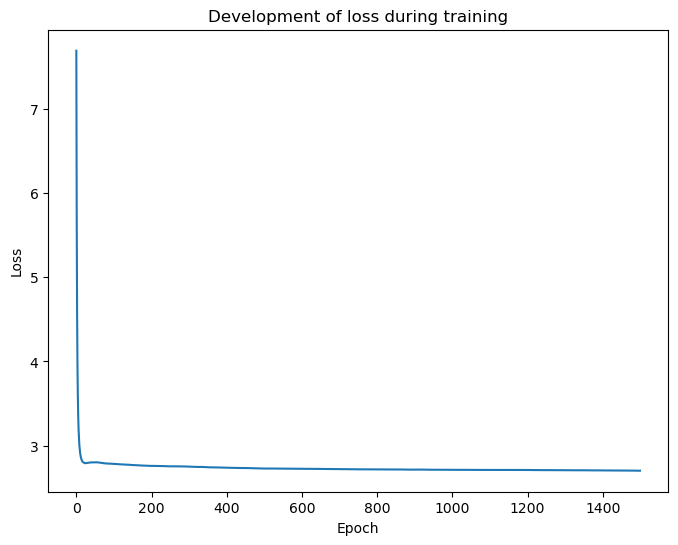

In [37]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(model.losses)),model.losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Development of loss during training")
plt.show()

In [ ]:
#2.4.2.c
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-2.4.2 Multi class MLP hyperparameters tunining")

from itertools import product
h_param = {
        'learning_rate': [0.005, 0.001],
        'epochs' : [1500,2000,3000],
        'hidden_layer_neurons': [[11],[13]],
        'activation_functions' : ['ReLU'],
        'optimization_techniques' : ['MBGD']
        }

hyper_param = list(product(*h_param.values()))
J=0
accuracy_labelwise = []
f1_micro = []
f1_macro = []
accuracy = []
precision_micro = []
precision_macro = []
cm = []
recall_micro = []
recall_macro = []
for i in hyper_param:
    model = multi_layer_perceptron_multi_class_classification(learning_rate = i[0], activation_function = i[3],input_size=10,
    output_size=8, hidden_layers = i[2], optimiser = i[4],batch_size = 50)
    model.fit(X_train_norm_df,Y_train,epochs=i[1])
  
    Y_pred = model.predict_labels(X_valid_norm_df)
    acc = np.mean((Y_pred==Y_valid) & (Y_valid == 1))
    
    wandb.log({"Hyper parameters pair":J,"accuracy": acc, "loss": model.loss})
    predicted_value = Y_pred
    Y_test = Y_valid
    accuracy_t= accuracy_score(Y_test, predicted_value,)
    f1_t = f1_score(Y_test, predicted_value, average='micro')
    f1_t2 = f1_score(Y_test, predicted_value, average='macro')
    precision_t = precision_score(Y_test, predicted_value, average='micro', zero_division=1)
    precision_t2 = precision_score(Y_test, predicted_value, average='macro', zero_division=1)
    recall_t = recall_score(Y_test, predicted_value, average='micro', zero_division=1)
    recall_t2 = recall_score(Y_test, predicted_value, average='macro', zero_division=1)

    f1_micro.append(f1_t)
    f1_macro.append(f1_t2)
    accuracy.append(accuracy_t)
    precision_micro.append(precision_t)
    precision_macro.append(precision_t2)
    recall_micro.append(recall_t)
    recall_macro.append(recall_t2)
    J+=1
    accuracy_labelwise.append(acc)
data = {'f1_micro': f1_micro, 'f1_macro': f1_macro, 'accuracy': accuracy,
'precision_micro': precision_micro,'precision_macro':precision_macro, 'recall_micro': recall_micro, 'recall_macro': recall_macro}
df = pd.DataFrame(data)
    
wandb.finish()
df

Text(0.5, 1.0, 'Accuracy for different hyper parameters')

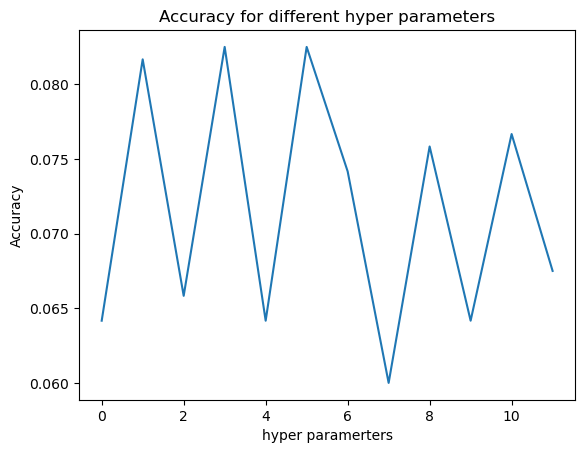

In [11]:
plt.plot(accuracy_labelwise)
plt.xlabel('hyper paramerters')
plt.ylabel('Accuracy')
plt.title("Accuracy for different hyper parameters")

In [13]:
Max_accu_hy_param_index = np.argmax(accuracy_labelwise)
print(f"The maximum accuracy = {accuracy_labelwise[Max_accu_hy_param_index]} \nWe get this accuracy for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Max_accu_hy_param_index]}.")

The maximum accuracy = 0.0825 
We get this accuracy for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.005, 2000, [13], 'ReLU', 'MBGD').


In [ ]:
#2.4.2.c
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-2.4.2.c Multi class MLP hyperparameters tunining")

from itertools import product
h_param = {
        'learning_rate': [0.005],
        'epochs' : [2000],
        'hidden_layer_neurons': [[13]],
        'activation_functions' : ['ReLU', 'Sigmoid', 'Tanh'],
        'optimization_techniques' : ['BGD', 'MBGD','SGD']
        }

hyper_param = list(product(*h_param.values()))
J=0
accuracy_labelwise = []
f1_micro = []
f1_macro = []
accuracy = []
precision_micro = []
precision_macro = []
cm = []
recall_micro = []
recall_macro = []
for i in hyper_param:
    model = multi_layer_perceptron_multi_class_classification(learning_rate = i[0], activation_function = i[3],input_size=10,
    output_size=8, hidden_layers = i[2], optimiser = i[4],batch_size = 50)
    model.fit(X_train_norm_df,Y_train,epochs=i[1])
  
    Y_pred = model.predict_labels(X_valid_norm_df)
    acc = np.mean((Y_pred==Y_valid) & (Y_valid == 1))
    
    wandb.log({"Hyper parameters pair":J,"accuracy": acc, "loss": model.loss})
    predicted_value = Y_pred
    Y_test = Y_valid
    accuracy_t= accuracy_score(Y_test, predicted_value,)
    f1_t = f1_score(Y_test, predicted_value, average='micro')
    f1_t2 = f1_score(Y_test, predicted_value, average='macro')
    precision_t = precision_score(Y_test, predicted_value, average='micro', zero_division=1)
    precision_t2 = precision_score(Y_test, predicted_value, average='macro', zero_division=1)
    recall_t = recall_score(Y_test, predicted_value, average='micro', zero_division=1)
    recall_t2 = recall_score(Y_test, predicted_value, average='macro', zero_division=1)

    f1_micro.append(f1_t)
    f1_macro.append(f1_t2)
    accuracy.append(accuracy_t)
    precision_micro.append(precision_t)
    precision_macro.append(precision_t2)
    recall_micro.append(recall_t)
    recall_macro.append(recall_t2)
    J+=1
    accuracy_labelwise.append(acc)
data = {'f1_micro': f1_micro, 'f1_macro': f1_macro, 'accuracy': accuracy,
'precision_micro': precision_micro,'precision_macro':precision_macro, 'recall_micro': recall_micro, 'recall_macro': recall_macro}
df = pd.DataFrame(data)
    
wandb.finish()
df

In [16]:
Max_accu_hy_param_index = np.argmax(accuracy_labelwise)
print(f"The maximum accuracy = {accuracy_labelwise[Max_accu_hy_param_index]} \nWe get this accuracy for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Max_accu_hy_param_index]}.")

The maximum accuracy = 0.08833333333333333 
We get this accuracy for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.005, 2000, [13], 'Sigmoid', 'BGD').


### 2.4.3

Evaluate your model on the test set and report accuracy, f1 score, precision, and recall.

In [17]:
i = hyper_param[Max_accu_hy_param_index]
model = multi_layer_perceptron_multi_class_classification(learning_rate = i[0], activation_function = i[3],input_size=10,
output_size=8, hidden_layers = i[2], optimiser = i[4],batch_size = 50)
model.fit(X_train_norm_df,Y_train,epochs=i[1])

Y_pred = model.predict_labels(X_test_norm_df)

Accuracy_labelwise = np.mean((Y_pred==Y_test) & (Y_test == 1))
print('Accuracy_labelwise:',Accuracy_labelwise)
f1_micro = []
f1_macro = []
accuracy = []
precision_micro = []
precision_macro = []
cm = []
recall_micro = []
recall_macro = []
predicted_value = np.argmax(model.predict_labels(X_valid_norm_df),axis=1).reshape(-1,1)
Y_test = np.argmax(Y_valid,axis=1).reshape(-1,1)
accuracy_t= accuracy_score(Y_test, predicted_value,)
f1_t = f1_score(Y_test, predicted_value, average='micro')
f1_t2 = f1_score(Y_test, predicted_value, average='macro')
precision_t = precision_score(Y_test, predicted_value, average='micro', zero_division=1)
precision_t2 = precision_score(Y_test, predicted_value, average='macro', zero_division=1)
recall_t = recall_score(Y_test, predicted_value, average='micro', zero_division=1)
recall_t2 = recall_score(Y_test, predicted_value, average='macro', zero_division=1)

f1_micro.append(f1_t)
f1_macro.append(f1_t2)
accuracy.append(accuracy_t)
precision_micro.append(precision_t)
precision_macro.append(precision_t2)
recall_micro.append(recall_t)
recall_macro.append(recall_t2)

data = {'f1_micro': f1_micro, 'f1_macro': f1_macro, 'accuracy': accuracy,
'precision_micro': precision_micro,'precision_macro':precision_macro, 'recall_micro': recall_micro, 'recall_macro': recall_macro}
df = pd.DataFrame(data)
print("The results on the the test data for best hyperparameters:")
df


Accuracy_labelwise: 0.075
The results on the the test data for best hyperparameters:


,f1_micro,f1_macro,accuracy,precision_micro,precision_macro,recall_micro,recall_macro
0,0.213333,0.145958,0.213333,0.213333,0.14218,0.213333,0.161979


# Q-3

## Multilayer Perceptron Regression


## 3.1 Data Preprocessing

In [39]:
X_data_m = pd.read_csv('HousingData.csv')
print("The shape of the data:",X_data_m.shape)
#Nan value replaced by mean of the feature
for i in X_data_m.columns:
    X_data_m[i].fillna(X_data_m[i].mean(), inplace=True)

The shape of the data: (506, 14)


### 3.1.1 mean, standard deviation, min, and max values for all attributes.

In [40]:
# 3.1.1
X_mean = np.mean(X_data_m,axis=0)
X_std = np.std(X_data_m,axis=0)
X_min = np.min(X_data_m,axis=0)
X_max = np.max(X_data_m,axis=0)
col = ['Mean','Std','Max','Min']
inx = X_data_m.columns
data = np.array([X_mean,X_std,X_max,X_min]).T
print(pd.DataFrame(data, index=inx, columns=col))

               Mean         Std       Max        Min
CRIM       3.611874    8.537322   88.9762    0.00632
ZN        11.211934   22.898391  100.0000    0.00000
INDUS     11.083992    6.692542   27.7400    0.46000
CHAS       0.069959    0.249986    1.0000    0.00000
NOX        0.554695    0.115763    0.8710    0.38500
RM         6.284634    0.701923    8.7800    3.56100
AGE       68.518519   27.412339  100.0000    2.90000
DIS        3.795043    2.103628   12.1265    1.12960
RAD        9.549407    8.698651   24.0000    1.00000
TAX      408.237154  168.370495  711.0000  187.00000
PTRATIO   18.455534    2.162805   22.0000   12.60000
B        356.674032   91.204607  396.9000    0.32000
LSTAT     12.715432    7.005806   37.9700    1.73000
MEDV      22.532806    9.188012   50.0000    5.00000


### 3.1.2 Graph to show the distribution of the various labels across the entire dataset

Text(0, 0.5, 'Count')

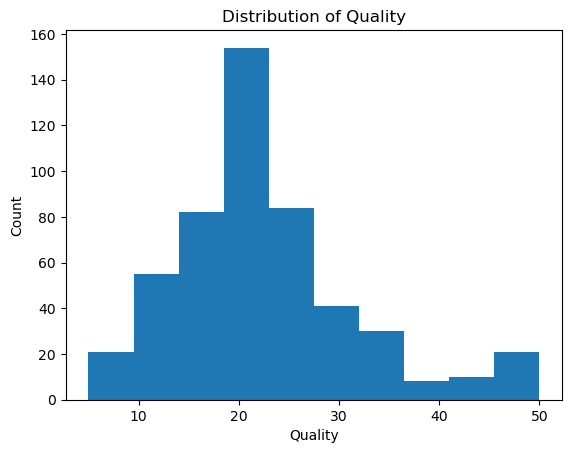

In [41]:
X_data_m["MEDV"].sort_index().plot(kind='hist')
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')

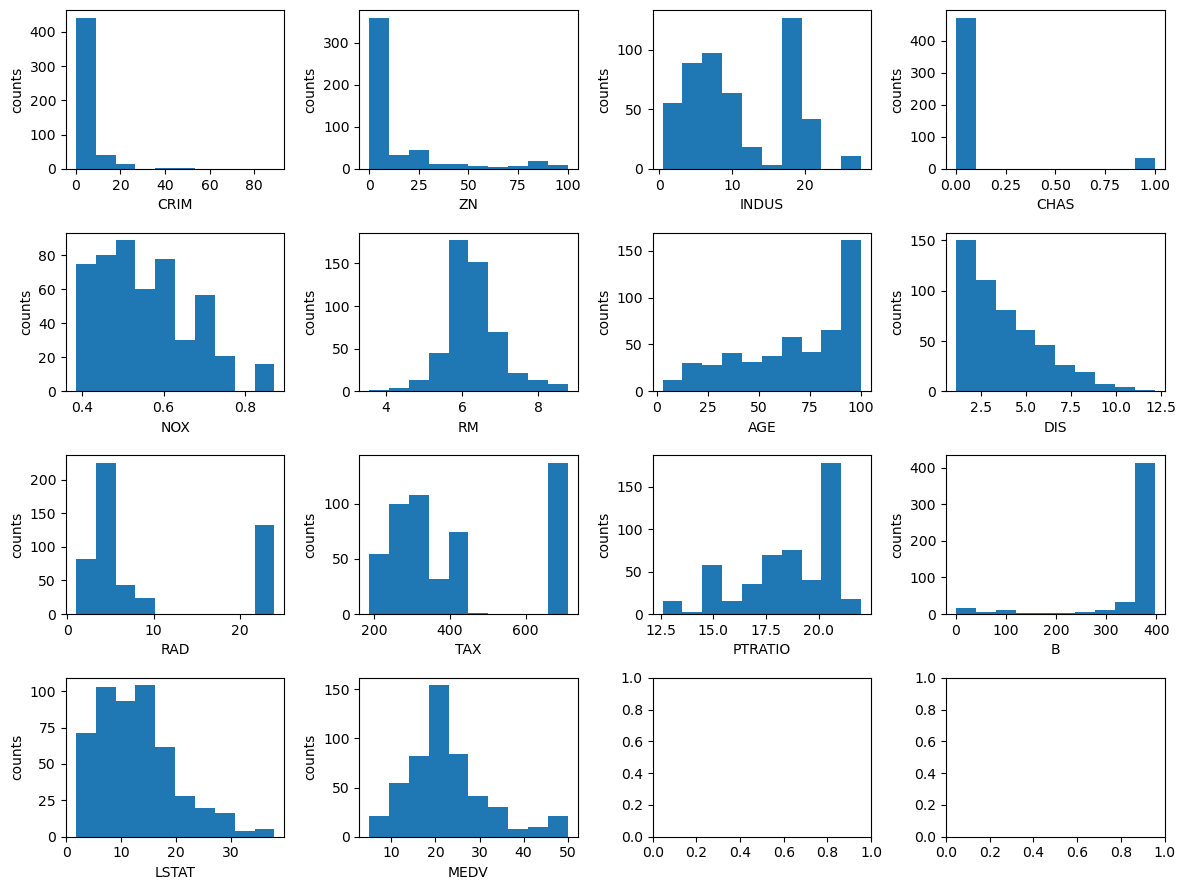

In [21]:
fig, axes = plt.subplots(4,4, figsize = (12,9))
i = 0
k=0
j=0
for attribute in X_data_m.columns:
    k = k+1
    axes[i][j].hist(X_data_m[attribute])
    axes[i][j].set_xlabel(attribute)
    axes[i][j].set_ylabel("counts")
    j = j+1
    if k%4 == 0:
        i = i+1
        j=0

plt.tight_layout()
plt.show()

### 3.1.3 Partition the dataset into train, validation, and test sets

In [42]:
Y_data = X_data_m['MEDV']
X_train_t, X_test, Y_train_t, Y_test = train_test_split(X_data_m,Y_data,test_size=0.15,random_state=1)
X_train, X_valid,Y_train, Y_valid = train_test_split(X_train_t,Y_train_t,test_size=0.177,random_state=1)
print("Shape of the train, test and validaton data:",X_train.shape,X_test.shape,X_valid.shape)
print("Shape of the train, test and validaton label:",Y_train.shape,Y_test.shape,Y_valid.shape)

Shape of the train, test and validaton data: (353, 14) (76, 14) (77, 14)
Shape of the train, test and validaton label: (353,) (76,) (77,)


### 3.1.4 Normalise and standarize the dataset

In [43]:
X_train_norm = preprocessing.normalize(X_train,axis=0)
X_test_norm = preprocessing.normalize(X_test,axis=0)
X_valid_norm = preprocessing.normalize(X_valid,axis=0)
std = preprocessing.StandardScaler()
X_train_norm = std.fit_transform(X=X_train)
X_test_norm = std.fit_transform(X=X_test)
X_valid_norm = std.fit_transform(X=X_valid)

X_train_norm_df = pd.DataFrame(X_train_norm,columns= X_data_m.columns)
X_test_norm_df = pd.DataFrame(X_test_norm,columns= X_data_m.columns)
X_valid_norm_df = pd.DataFrame(X_valid_norm,columns= X_data_m.columns)

Y_train_norm_df = X_train_norm_df["MEDV"]
Y_test_norm_df = X_test_norm_df["MEDV"]
Y_valid_norm_df = X_valid_norm_df["MEDV"]

X_train_norm_df = X_train_norm_df.drop('MEDV',axis=1)
X_test_norm_df = X_test_norm_df.drop('MEDV',axis=1)
X_valid_norm_df = X_valid_norm_df.drop('MEDV',axis=1)

print("Shape of the train, test and validaton data:")
print(X_train_norm_df.shape,X_test_norm_df.shape,X_valid_norm_df.shape)


Shape of the train, test and validaton data:
(353, 13) (76, 13) (77, 13)


## 3.2 MLP Regression Implementation from Scratch

In [44]:
class multi_layer_perceptron_regression:
    def __init__(self, learning_rate, activation_function,input_size,output_size=1, hidden_layers = [8], optimiser = 'MBGD',batch_size = 50):
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.input_size = input_size              # no of features in the input dataset
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.optimiser = optimiser
        self.batch_size = batch_size
        self.weights, self.biases = self.intialize_weight_and_bias()
        self.loss = None
        self.losses = []
    def fit(self,X,y,epochs = 500):
      
        if self.output_size == 1:
            loss_function = self.binary_cross_entropy_loss
        else:
            loss_function = self.categorical_cross_entropy_loss

        for epoch in range(epochs):

            if self.optimiser=='BGD':
                output, activations = self.forward(X)
                self.backward(X, y, output, activations)

            elif self.optimiser=='MBGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // self.batch_size
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)

                for i in range(num_batches):
                    X_batche = X_batches[i]
                    Y_batche = Y_batches[i]
                    out, activations = self.forward(X_batche)
                    self.backward(X_batche, Y_batche, out, activations)
                    output = np.append(output, out, axis=0)

            elif self.optimiser=='SGD':
                output = np.empty((0, self.output_size))
                num_batches = X.shape[0] // 1
                X_batches = np.array_split(X, num_batches)
                Y_batches = np.array_split(y,num_batches)
                for i in range(X.shape[0]):
                    out, activations = self.forward(X_batches[i])
                    self.backward(X_batches[i], Y_batches[i], out, activations)
                    output = np.append(output, out, axis=0)

            else:
                raise ValueError("Invalid optimizer!")
            self.loss = loss_function(np.array(y).reshape(X.shape[0],1), output)
            self.losses.append(self.loss)
            # # if epoch % 100 == 0:
            #     print(f"Epoch {epoch}, Loss: {loss}")
            
    def intialize_weight_and_bias(self):
        weights = []
        biases = []
        weight = np.random.randn(self.input_size, self.hidden_layers[0])
        bias = np.zeros((self.hidden_layers[0],1))
        weights.append(weight)
        biases.append(bias)
        np.random.seed(42)

        for i in range(1, len(self.hidden_layers)):
            weight = np.random.randn(self.hidden_layers[i-1], self.hidden_layers[i])
            bias = np.zeros((self.hidden_layers[i],1))
            weights.append(weight)
            biases.append(bias)
    
        weight = np.random.randn(self.hidden_layers[-1],self.output_size)
        bias = np.zeros((self.output_size,1))
        weights.append(weight)
        biases.append(bias)

        return weights, biases

    def forward(self, X_train):
        activations = []  #output of layears
        layer_input = X_train #inpute of all layears

        for i in range(len(self.hidden_layers)):
            weighted_sum = np.dot(layer_input ,self.weights[i])
            weighted_sum_n = weighted_sum + np.array(self.biases[i]).T     #check
            activation = self.activation_func(weighted_sum_n)
            
            activations.append(activation)
            layer_input = activation

        output = np.dot(layer_input,self.weights[-1])
        output += np.array(self.biases[-1]).T   #check
        # if self.output_size == 1:
        #     output = self.sigmoid(output)
        # else:
        #     output = self.softmax(output)
        # print("output shape:",output.shape)
        return output, activations

    def softmax(self,X):
        exp_X = np.exp(X - np.max(X))  # Stability fix
        return exp_X / np.sum(exp_X, axis=1, keepdims=True).reshape(-1,1)

    def activation_func(self, weighted_sum):
        if self.activation_function == 'ReLU':
            return np.maximum(0, weighted_sum)

        elif (self.activation_function == 'Sigmoid'):
            return 1 / (1 + np.exp(-weighted_sum))

        elif (self.activation_function == 'Tanh'):
            return np.tanh(weighted_sum)

        else:
            raise ValueError("Invalid Activation Function.")
            return 

    def activation_func_derivative(self,X):
        if self.activation_function == 'ReLU' :
            return (X > 0).astype(float)

        elif (self.activation_function == 'Sigmoid'):
            return X * (1 - X)

        elif (self.activation_function == 'Tanh'):
            return (1 - X**2)

        else:
            raise ValueError("Invalid Activation Function.")
            return 

    def backward(self,X,Y, output, activations):
        gradient_weights = []
        gradient_biases = []
        error_delta = output-np.array(Y).reshape(X.shape[0],1)
        
        gradient_weight = np.dot(activations[-1].T,error_delta)
        gradient_bias = np.sum(error_delta)

        gradient_weights.append(gradient_weight)
        gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers), 0, -1):
            error = np.dot( error_delta, self.weights[i].T)

            activation_derivative = self.activation_func_derivative(activations[i-1])
            if np.any(np.isnan(error)) or np.any(np.isnan(activation_derivative)):
                # Handle the case of NaN values here, for example:
                error_delta = np.zeros_like(error)
            else:
                error_delta = error * activation_derivative

            # error_delta = error * activation_derivative
            gradient_weight = np.dot(activations[i - 2].T, error_delta) if (i-1) > 0 else np.dot(X.T,error_delta)
            gradient_bias = np.sum(error_delta)

            gradient_weights.append(gradient_weight)
            gradient_biases.append(gradient_bias)

        for i in range(len(self.hidden_layers)+1):
            self.weights[i] -= self.learning_rate * gradient_weights[len(self.hidden_layers)-i]
            self.biases[i] -= self.learning_rate * gradient_biases[len(self.hidden_layers)-i]
        # print(self.weights[1])
    def binary_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0 and -ve)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        
    def categorical_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-14  # Small constant to prevent log(0)
        return -np.sum(y_true * np.log(y_pred + epsilon)) / len(y_true)

    def predict_value(self,X_test):
        output, _ = self.forward(X_test)
        return output

    def Mean_square_error(self, X_test, Y_test):
        X_test = np.array(X_test)
        Y_test = np.array(Y_test).reshape(X_test.shape[0],1)
        y_pred = self.predict_value(X_test)
        MSE = np.sum((y_pred - Y_test)**2)/Y_test.shape[0]
        return MSE
    def Root_mean_square_error(self, X_test, Y_test):
        MSE = self.Mean_square_error(X_test, Y_test)
        return MSE**(0.5)
    def Root_squared(self,X_test,Y_test):
        X_test = np.array(X_test)
        Y_test = np.array(Y_test).reshape(X_test.shape[0],1)
        MSE = self.Mean_square_error(X_test, Y_test)
        d = np.sum((Y_test-np.mean(Y_test))**2)
        return 1-MSE/d

In [45]:
model = multi_layer_perceptron_regression(learning_rate = 0.0001, activation_function = 'ReLU',input_size = 13,output_size=1, hidden_layers = [9], optimiser = 'MBGD',batch_size = 50)
model.fit(X_train_norm_df,Y_train_norm_df, epochs=1000)
MSE = model.Mean_square_error(X_valid_norm_df,Y_valid_norm_df)
RMSE = model.Root_mean_square_error(X_valid_norm_df,Y_valid_norm_df)
R_s = model.Root_squared(X_valid_norm_df,Y_valid_norm_df)
print(f"MSE={MSE}, RMSE={RMSE}, R_squared={R_s}")

MSE=0.2670041633940227, RMSE=0.5167244559666425, R_squared=0.9965324134624153


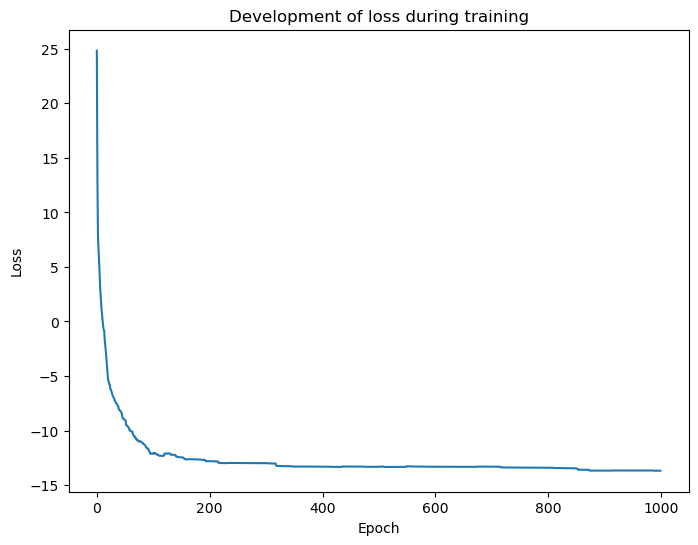

In [46]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(model.losses)),model.losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Development of loss during training")
plt.show()

## 3.3 Model Training & Hyperparameter Tuning using W&B

In [ ]:
#3.3.3
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-3.3.3a MLP hyperparameters tunining")

from itertools import product
h_param = {
        'learning_rate': [0.001,0.0005,0.0001],
        'epochs' : [2000,3000,4000],
        'hidden_layer_neurons': [[13],[17]],
        'activation_functions' : ['ReLU'],
        'optimization_techniques' : ['MBGD']
        }

hyper_param = list(product(*h_param.values()))
J=0
MSE_error = []
for i in hyper_param:
    model = multi_layer_perceptron_regression(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 13,output_size = 1)
    model.fit(X_train_norm_df,Y_train_norm_df,epochs=i[1])
    MSE = model.Mean_square_error(X_test=X_valid_norm_df, Y_test=Y_valid_norm_df)
    # MSE = model.Mean_square_error(X_valid_norm_df,Y_valid_norm_df)
    RMSE = model.Root_mean_square_error(X_valid_norm_df,Y_valid_norm_df)
    R_s = model.Root_squared(X_valid_norm_df,Y_valid_norm_df)
    l = model.loss
    wandb.log({"Hyper parameters pair":J,"MSE": MSE, "loss": l})
    J+=1
    MSE_error.append(MSE)
    print('Hyperparameters',i)
    print(f"MSE={MSE}, RMSE={RMSE}, R_squared={R_s}")
wandb.finish()

In [49]:
for i in range(len(MSE_error)):
    if MSE_error[i]== None :
        MSE_error[i]==100    #to avoid Nan values
Min_MSE_hy_param_index = np.argmin(MSE_error)
MSE_error[Min_MSE_hy_param_index]
hyper_param[Min_MSE_hy_param_index]
print(f"The Minimum MSE = {MSE_error[Min_MSE_hy_param_index]} \nWe get this MSE for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Min_MSE_hy_param_index]}.")

The Minimum MSE = 0.10802566143565258 
We get this MSE for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.0005, 3000, [17], 'ReLU', 'MBGD').


In [ ]:
#3.3.3
import wandb
import random

# start a new wandb run to track this script
wandb.init(project="Q-3.3.3b MLP hyperparameters tunining")

from itertools import product
h_param = {
        'learning_rate': [0.0005],
        'epochs' : [3000],
        'hidden_layer_neurons': [[17]],
        'activation_functions' : ['ReLU', 'Sigmoid', 'Tanh'],
        'optimization_techniques' : ['BGD', 'MBGD','SGD']
        }

hyper_param = list(product(*h_param.values()))
J=0
MSE_error = []
for i in hyper_param:
    model = multi_layer_perceptron_regression(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 13,output_size = 1)
    model.fit(X_train_norm_df,Y_train_norm_df,epochs=i[1])
    MSE = model.Mean_square_error(X_test=X_valid_norm_df, Y_test=Y_valid_norm_df)
    RMSE = model.Root_mean_square_error(X_valid_norm_df,Y_valid_norm_df)
    R_s = model.Root_squared(X_valid_norm_df,Y_valid_norm_df)
    l = model.loss
    wandb.log({"Hyper parameters pair":J,"MSE": MSE, "loss": l})
    J+=1
    MSE_error.append(MSE)
    print('Hyperparameters',i)
    print(f"MSE={MSE}, RMSE={RMSE}, R_squared={R_s}")
wandb.finish()

In [61]:
# for i in range(len(MSE_error)):
    #if MSE_error[i]== 0 :
MSE_error[0]=100    #to avoid 'Nan' values as minimum
Min_MSE_hy_param_index = np.argmin(MSE_error)
MSE_error[Min_MSE_hy_param_index]
hyper_param[Min_MSE_hy_param_index]
print(f"The Minimum MSE = {MSE_error[Min_MSE_hy_param_index]} \nWe get this MSE for this hyperparameters\n(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): {hyper_param[Min_MSE_hy_param_index]}.")

The Minimum MSE = 0.13783509008981892 
We get this MSE for this hyperparameters
(Learning rate, epochs, Hidden layer nodes, activation function, optomizer): (0.0005, 3000, [17], 'ReLU', 'MBGD').


## 3.4 Evaluating Model

Test your model on the test set and report loss score (MSE, RMSE, Rsquared).


In [62]:
#3.4
i = hyper_param[Min_MSE_hy_param_index]
model = multi_layer_perceptron_regression(learning_rate=i[0], hidden_layers = i[2],activation_function = i[3],optimiser=i[4],input_size = 13,output_size = 1)
model.fit(X_train_norm_df,Y_train_norm_df,epochs=i[1])
MSE = model.Mean_square_error(X_test=X_test_norm_df, Y_test=Y_test_norm_df)
RMSE = model.Root_mean_square_error(X_valid_norm_df,Y_valid_norm_df)
R_s = model.Root_squared(X_valid_norm_df,Y_valid_norm_df)
print('Hyperparameters',i)
print(f"MSE={MSE}, RMSE={RMSE}, R_squared={R_s}")

Hyperparameters (0.0005, 3000, [17], 'ReLU', 'MBGD')
MSE=0.19274678086522284, RMSE=0.3712614847918094, R_squared=0.9982099338949374
